# Day 12

In [44]:
from math import inf
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [45]:
with open('input-12.txt') as f:
    lines = f.read().strip()

In [46]:
alpha_map = lines.split('\n')

In [47]:
for row in alpha_map:
    print(row)

abcccccccccccccccccaaccccccccccccaaaaaaaacccccccccccaaaaaccccaaaaaaccaaaaaaaaaaaaaaaaaccccccccccccccccaaacccccaaaaaaaacccaaaccccccccccccccccccccccccccccccccccccccccccccccccccaaaaa
abccccccccccccccccaaacaacccccccccccaaaacccccccccccccaaaaaacccaaaaaaccaaaaaaaaaaaaaaaaaaaacccccccccaaacaaacccccaaaaaaaaaccaaaaccccccccccccccccccccccccccccccccccccccccccccccccaaaaaa
abcccccccccccccccccaaaaacccccccccccaaaaaccccccccccccaaaaaaccccaaaacccaaaacccaaaaaaaaaaaaacccccccccaaaaaaaaaacccaaaaaaaaccaaaaccccccccccccccccccccccccccccccccccaaacccccccccccaaaaaa
abcccccccccccccccaaaaaacccccccccccaaacaaccaaccccccccaaaaaaccccaaaacccaaaccccaaaaaaaaaaaaaccccccccccaaaaaaaaaccaaaaaacccccaaacccccccccccccccccccccccccccccccccccaaaccccccccccccccaaa
abcccccccccccccccaaaaaaaacccccccccaacccacaaacaacccccccaaccccccaccaccccccccaaaaaaaaaaaaccccccccccccccaaaaaaacccaaaaaaacccccccccccccaacccccccccccccccccccccccccccaaaccccccccccccccaaa
abcccccccccccccccaacaaaaacccccccccccccccccaaaaacccccccccccccccccccccccccccaaaaaaaaaaaacccccccccccccc

In [48]:
z_dict = dict([(letter, index) for index, letter in enumerate(string.ascii_lowercase)])
z_dict['S'] = 0
z_dict['E'] = len(string.ascii_lowercase)-1
z_dict

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 'S': 0,
 'E': 25}

In [49]:
map = {(x,y) : {'xyz' : (x, y, z_dict[tag]), 'tag' : tag} for y, row in enumerate(alpha_map) for x, tag in enumerate(row)}
map

{(0, 0): {'xyz': (0, 0, 0), 'tag': 'a'},
 (1, 0): {'xyz': (1, 0, 1), 'tag': 'b'},
 (2, 0): {'xyz': (2, 0, 2), 'tag': 'c'},
 (3, 0): {'xyz': (3, 0, 2), 'tag': 'c'},
 (4, 0): {'xyz': (4, 0, 2), 'tag': 'c'},
 (5, 0): {'xyz': (5, 0, 2), 'tag': 'c'},
 (6, 0): {'xyz': (6, 0, 2), 'tag': 'c'},
 (7, 0): {'xyz': (7, 0, 2), 'tag': 'c'},
 (8, 0): {'xyz': (8, 0, 2), 'tag': 'c'},
 (9, 0): {'xyz': (9, 0, 2), 'tag': 'c'},
 (10, 0): {'xyz': (10, 0, 2), 'tag': 'c'},
 (11, 0): {'xyz': (11, 0, 2), 'tag': 'c'},
 (12, 0): {'xyz': (12, 0, 2), 'tag': 'c'},
 (13, 0): {'xyz': (13, 0, 2), 'tag': 'c'},
 (14, 0): {'xyz': (14, 0, 2), 'tag': 'c'},
 (15, 0): {'xyz': (15, 0, 2), 'tag': 'c'},
 (16, 0): {'xyz': (16, 0, 2), 'tag': 'c'},
 (17, 0): {'xyz': (17, 0, 2), 'tag': 'c'},
 (18, 0): {'xyz': (18, 0, 2), 'tag': 'c'},
 (19, 0): {'xyz': (19, 0, 0), 'tag': 'a'},
 (20, 0): {'xyz': (20, 0, 0), 'tag': 'a'},
 (21, 0): {'xyz': (21, 0, 2), 'tag': 'c'},
 (22, 0): {'xyz': (22, 0, 2), 'tag': 'c'},
 (23, 0): {'xyz': (23, 0, 2), '

In [50]:
# stats

map_x_size = max([key[0] for key in map.keys()]) + 1
map_y_size = max([key[1] for key in map.keys()]) + 1
print(f"map size: {map_x_size} x {map_y_size}")

sx, sy, sz = [map[key]['xyz'] for key in map.keys() if map[key]['tag'] == 'S'][0]
ex, ey, ez = [map[key]['xyz'] for key in map.keys() if map[key]['tag'] == 'E'][0]
print(f'S coordinates: {sx}, {sy}, {sz}')
print(f'E coordinates: {ex}, {ey}, {ez}')

map size: 179 x 41
S coordinates: 0, 20, 0
E coordinates: 154, 20, 25


In [51]:
def neighbours_finder(coordinates):
    
    def step_check(coordinates, candidate):
        # it is only possible to step-up 1 unit (no limit going down)
        return map[candidate]['xyz'][-1]-map[coordinates]['xyz'][-1] <= 1

    x, y, z = map[coordinates]['xyz']
    neighbours = []
    
    for candidate in [(x+1, y), (x, y+1), (x-1, y), (x, y-1)]:
        if candidate[0] in range(map_x_size) and candidate[1] in range(map_y_size) and step_check(coordinates, candidate):
            neighbours.append(candidate)

    return tuple(neighbours)

In [52]:
def manhattan_distance(coordinates1, coordinates2):
    x1, y1 = coordinates1
    x2, y2 = coordinates2
    return abs(x1 - x2) + abs(y1 - y2)

In [53]:
for key in map.keys():
    map[key]['neighbours'] = neighbours_finder(key)
    map[key]['came_from'] = None
    map[key]['gScore'] = inf if key != (sx, sy) else 0
    map[key]['hScore'] = manhattan_distance(key, (ex, ey))
    map[key]['fScore'] = map[key]['gScore'] + map[key]['hScore']

In [54]:
map[(0,20)]

{'xyz': (0, 20, 0),
 'tag': 'S',
 'neighbours': ((1, 20), (0, 21), (0, 19)),
 'came_from': None,
 'gScore': 0,
 'hScore': 154,
 'fScore': 154}

In [55]:
def path_finder(current):

    visited = []
    to_visit = []
    

    while map[current]['tag'] != 'E':
        for neighbour in map[current]['neighbours']:
            if neighbour not in visited and neighbour not in to_visit:
                to_visit.append(neighbour)
                if map[neighbour]['gScore'] > map[current]['gScore']+1:
                    map[neighbour]['came_from'] = current
                    map[neighbour]['gScore'] = map[current]['gScore']+1
                    map[neighbour]['fScore'] = map[neighbour]['gScore'] + map[neighbour]['hScore']
        visited.append(current)
        to_visit.sort(key=lambda x : map[x]['fScore'])
        current = to_visit.pop(0)

    path = []
    current = (ex, ey)
    while map[current]['tag'] != 'S':
        path.insert(0, current)
        current = map[current]['came_from']
    path.insert(0, (sx, sy))

    return path

In [56]:
current = (sx, sy)

shortest_path = path_finder(current)

In [57]:
shortest_path

[(0, 20),
 (1, 20),
 (2, 20),
 (3, 20),
 (4, 20),
 (5, 20),
 (6, 20),
 (7, 20),
 (8, 20),
 (9, 20),
 (10, 20),
 (11, 20),
 (12, 20),
 (13, 20),
 (14, 20),
 (15, 20),
 (16, 20),
 (16, 21),
 (16, 22),
 (16, 23),
 (17, 23),
 (18, 23),
 (19, 23),
 (20, 23),
 (21, 23),
 (22, 23),
 (23, 23),
 (24, 23),
 (25, 23),
 (26, 23),
 (27, 23),
 (28, 23),
 (29, 23),
 (30, 23),
 (31, 23),
 (32, 23),
 (33, 23),
 (33, 24),
 (34, 24),
 (35, 24),
 (36, 24),
 (37, 24),
 (38, 24),
 (39, 24),
 (40, 24),
 (40, 25),
 (41, 25),
 (42, 25),
 (42, 26),
 (42, 27),
 (43, 27),
 (44, 27),
 (45, 27),
 (46, 27),
 (47, 27),
 (48, 27),
 (49, 27),
 (50, 27),
 (51, 27),
 (52, 27),
 (53, 27),
 (54, 27),
 (55, 27),
 (56, 27),
 (57, 27),
 (58, 27),
 (59, 27),
 (60, 27),
 (61, 27),
 (62, 27),
 (63, 27),
 (64, 27),
 (65, 27),
 (66, 27),
 (67, 27),
 (68, 27),
 (69, 27),
 (70, 27),
 (71, 27),
 (72, 27),
 (73, 27),
 (74, 27),
 (75, 27),
 (76, 27),
 (77, 27),
 (78, 27),
 (79, 27),
 (80, 27),
 (81, 27),
 (81, 28),
 (82, 28),
 (83, 28)

In [58]:
#print(' -> '.join([str(item)[1:-1] for item in path]))

In [59]:
answer1 = len(shortest_path)-1
answer1

484

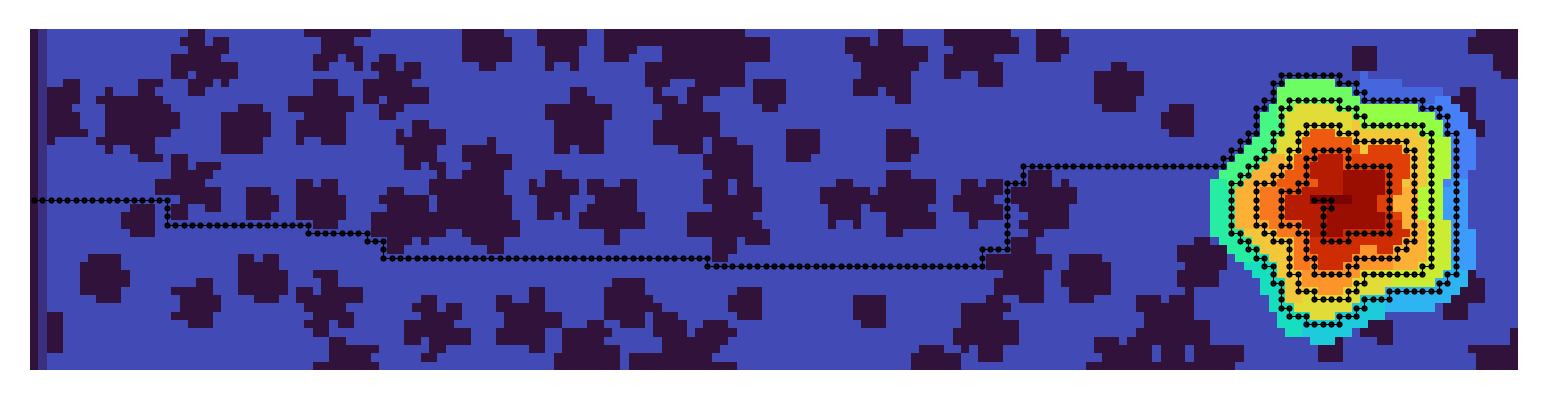

In [60]:
mpl.rcParams['figure.dpi'] = 300
#mpl.rcParams['figure.figsize'] = (24, 24)

z = [map[key]['xyz'][2] for key in map.keys()]
#z = [len(map[key]['neighbours']) for key in map.keys()]
#z = [map[key]['gScore'] for key in map.keys()]
plt.imshow(np.array_split(z, map_y_size), cmap=mpl.colormaps['turbo'])

#plt.scatter(x=sx, y=sy, c='w', s=1, marker='s')
#plt.scatter(x=ex, y=ey, c='w', s=1, marker='s')

x, y = zip(*path)
plt.plot(x, y, alpha=1, c='k', linewidth=0.25, marker='.', markersize=1)

#plt.show()
plt.axis('off')
plt.savefig("day-12.png", bbox_inches='tight', pad_inches = 0)

In [61]:
paths = {}
visited_points = set()
for candidate in [map[key]['xyz'] for key in map.keys()]:
    if candidate not in visited_points:
        candidate_path = path_finder(candidate)
        for index, coordinate in enumerate(candidate_path):
            paths[coordinate] = candidate_path[index:]
            visited_points.add(coordinate)
        paths[candidate] = candidate_path
        visited_points.update(candidate_path)


KeyError: (0, 0, 0)

In [ ]:
a = {}
type(a)

dict

In [ ]:
b = set()
type(b)

set

In [ ]:
b

set()